In [1]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
#https://drive.google.com/file/d/1GIGppvbet915cjBBFOtsTal8tIoLzV_H/view?usp=sharing
!gdown https://drive.google.com/uc?id=1GIGppvbet915cjBBFOtsTal8tIoLzV_H
!unzip /content/archive.zip
!rm -rf /content/archive.zip /content/Data/images_original

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1GIGppvbet915cjBBFOtsTal8tIoLzV_H
To: /content/archive.zip
100% 1.30G/1.30G [00:15<00:00, 81.3MB/s]
Archive:  /content/archive.zip
   creating: Data/
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
   creating: Data/genres_original/
   creating: Data/genres_original/blues/
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00

In [2]:
import pandas as pd
#Reading data
df = pd.read_csv('/content/Data/features_30_sec.csv')
df = df[['filename','label']]
df.head()

,filename,label
0,blues.00000.wav,blues
1,blues.00001.wav,blues
2,blues.00002.wav,blues
3,blues.00003.wav,blues
4,blues.00004.wav,blues


In [4]:
df.shape

(1000, 2)

In [3]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [5]:
import os
#validation check for missing files
r = []
for idx,row in df.iterrows():
  f = row['filename']
  f = f.split('.')[0]
  l = os.listdir(f"/content/Data/genres_original/{f}")
  if row['filename'] not in l:
    r.append(idx)

In [6]:
r

[]

In [7]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from IPython.core.display import display

In [9]:
df.head()

,filename,label
0,blues.00000.wav,blues
1,blues.00001.wav,blues
2,blues.00002.wav,blues
3,blues.00003.wav,blues
4,blues.00004.wav,blues


In [10]:
#printing sample data for each class
for i in df.label.unique():
    print(f'Sample for class = {i}')
    fname = f'/content/Data/genres_original/{i}/' + df[df['label'] == i]['filename'].values[0]
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(10, 3))
    librosa.display.waveplot(data, sr=sampling_rate)
    plt.show()
    display(ipd.Audio(fname))
    print('=='*50)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

In [12]:
#apply phase space
def phase_space_reconstruction(data, m):
    N = len(data)
    X = np.zeros((m, N-m))
    for i in range(m):
        X[i,:] = data[i:N-m+i]
    return X

In [13]:
#[[1,2],[2,3]] --> [1,2,3,4]

In [14]:
#apply mfcc
def audio_to_array(file):
  data, sr = librosa.load(file)
  mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=20)
  mfccs = np.array(mfccs, dtype=float)
  m=2
  X = phase_space_reconstruction(mfccs.ravel(), m)
  return X.ravel()

In [15]:
df.head()

,filename,label
0,blues.00000.wav,blues
1,blues.00001.wav,blues
2,blues.00002.wav,blues
3,blues.00003.wav,blues
4,blues.00004.wav,blues


In [16]:
from tqdm.auto import tqdm
#applying mfcc+phase space reconstruction
features = []
labels = []
for idx,row in tqdm(df.iterrows()):
  try:
    s = row['label']
    path = f'/content/Data/genres_original/{s}/'+row['filename']
    tmp = audio_to_array(path)
    features.append(tmp)
    labels.append(row['label'])
  except Exception as e:
    print(e)
    pass

df = pd.DataFrame(data = features)
df['labels'] = labels
df = df.fillna(0.0)

0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [17]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1] #remove 0 variance columns
df.head()

,0,1,2,3,4,5,6,7,8,9,...,52787,52788,52789,52790,52791,52792,52793,52794,52795,labels
0,-211.484650,-208.944809,-193.908890,-174.618713,-137.550354,-124.091797,-138.084045,-156.166870,-165.623688,-108.501251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
1,-312.902496,-223.677536,-156.065277,-148.910675,-180.661697,-223.887665,-264.082031,-298.813690,-312.372009,-322.293243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
2,-60.054520,-71.448967,-96.382812,-108.587616,-127.455368,-140.087631,-119.641884,-106.080132,-115.189369,-127.873024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
3,-187.644531,-196.836212,-213.412231,-220.421722,-233.713806,-240.523788,-246.085678,-259.390839,-270.888367,-275.427917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
4,-251.468124,-180.038361,-155.018448,-173.169327,-199.348526,-158.796570,-92.418327,-105.392021,-153.838638,-160.671860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues


In [18]:
df.shape

(999, 52797)

In [19]:
X = df.drop(columns = ['labels'])
y = df[['labels']]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, stratify=y,test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[ 6.52657345e-01,  8.96358520e-01,  1.08773268e+00, ...,
        -7.30602373e-03,  9.29501221e-04,  8.99624485e-03],
       [-6.27937531e-01, -8.33027644e-01, -1.09040492e+00, ...,
        -7.30602373e-03,  9.29501221e-04,  8.99624485e-03],
       [ 1.20603339e+00,  1.15531222e+00,  1.06616303e+00, ...,
        -7.30602373e-03,  9.29501221e-04,  8.99624485e-03],
       ...,
       [-6.13053613e-01, -7.41413779e-01, -5.05578299e-01, ...,
        -7.30602373e-03,  9.29501221e-04,  8.99624485e-03],
       [-2.65201960e+00, -2.81329663e+00, -2.99161635e+00, ...,
        -7.30602373e-03,  9.29501221e-04,  8.99624485e-03],
       [ 4.88177349e-01,  3.27425417e-01, -4.93657058e-02, ...,
        -7.30602373e-03,  9.29501221e-04,  8.99624485e-03]])

In [23]:
X_train.shape,X_test.shape

((749, 52796), (250, 52796))

In [24]:
y_train.shape,y_test.shape

((749, 1), (250, 1))

In [25]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import time
import scikitplot as skplt
from scikit import predict_score
import numpy as np
from sklearn.metrics import classification_report,balanced_accuracy_score,confusion_matrix

In [27]:
label = np.unique(y_train)
label

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [28]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

Results for DecisionTreeClassifiers :-

********************************************************************************

Training time(sec) =  40.79994511604309
Prediction time(sec) =  0.04115557670593262


********************************************************************************

Training score =  1.0
Tesing score =  0.35600000000000004


********************************************************************************


No of missclassified for class blues (test data) = 17 
No of missclassified for class classical (test data) = 5 
No of missclassified for class country (test data) = 22 
No of missclassified for class disco (test data) = 19 
No of missclassified for class hiphop (test data) = 18 
No of missclassified for class jazz (test data) = 13 
No of missclassified for class metal (test data) = 11 
No of missclassified for class pop (test data) = 16 
No of missclassified for class reggae (test data) = 22 
No of missclassified for class rock (test data) = 18 
--------------

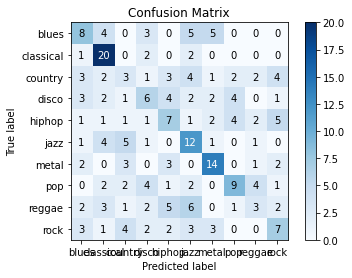



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       blues       0.33      0.32      0.33        25
   classical       0.51      0.80      0.62        25
     country       0.15      0.12      0.13        25
       disco       0.27      0.24      0.26        25
      hiphop       0.28      0.28      0.28        25
        jazz       0.32      0.48      0.39        25
       metal       0.50      0.56      0.53        25
         pop       0.45      0.36      0.40        25
      reggae       0.23      0.12      0.16        25
        rock       0.32      0.28      0.30        25

    accuracy                           0.36       250
   macro avg       0.34      0.36      0.34       250
weighted avg       0.34      0.36      0.34       250



********************************************************************************


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

print('Results for DecisionTreeClassifiers :-\n')
start_time = time.time()
dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',dt_time)

y_pred1 = dt.predict(X_train)

start_time = time.time()
y_pred = dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)

cm_dt = confusion_matrix(y_test, y_pred)
dt_miss = np.sum(y_pred!=y_test)
acc1_dt = balanced_accuracy_score(y_train,y_pred1)
acc2_dt = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_dt)
print('Tesing score = ',acc2_dt)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train))):
    err = np.sum(cm_dt[i])-cm_dt[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',dt_miss)
print('Total % of missclassified points (test data) = ',(dt_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

DT = [acc1_dt, acc2_dt, dt_miss, dt_miss/len(y_test), dt_time, dt_time2]

Results for KNeighborsClassifier :-

********************************************************************************

Training time(sec) =  0.0585634708404541
Prediction time(sec) =  1.0676500797271729


********************************************************************************

Training score =  0.7343783783783783
Tesing score =  0.716


********************************************************************************


No of missclassified for class blues (test data) = 7 
No of missclassified for class classical (test data) = 9 
No of missclassified for class country (test data) = 3 
No of missclassified for class disco (test data) = 9 
No of missclassified for class hiphop (test data) = 8 
No of missclassified for class jazz (test data) = 10 
No of missclassified for class metal (test data) = 8 
No of missclassified for class pop (test data) = 5 
No of missclassified for class reggae (test data) = 6 
No of missclassified for class rock (test data) = 6 
------------------------

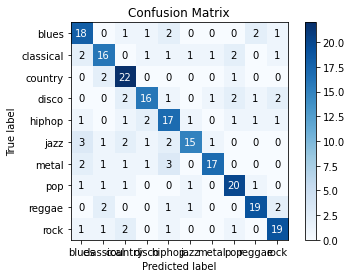



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       blues       0.64      0.72      0.68        25
   classical       0.67      0.64      0.65        25
     country       0.69      0.88      0.77        25
       disco       0.73      0.64      0.68        25
      hiphop       0.61      0.68      0.64        25
        jazz       0.79      0.60      0.68        25
       metal       0.85      0.68      0.76        25
         pop       0.74      0.80      0.77        25
      reggae       0.79      0.76      0.78        25
        rock       0.73      0.76      0.75        25

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



********************************************************************************


In [30]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier(n_neighbors=5)

print('Results for KNeighborsClassifier :-\n')
start_time = time.time()
dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',dt_time)

y_pred1 = dt.predict(X_train)

start_time = time.time()
y_pred = dt.predict(X_test)
y_pred1 = predict_score(y_pred1,y_train,0.35)
y_pred = predict_score(y_pred,y_test,0.35)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)

cm_dt = confusion_matrix(y_test, y_pred)
dt_miss = np.sum(y_pred!=y_test)
acc1_dt = balanced_accuracy_score(y_train,y_pred1)
acc2_dt = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_dt)
print('Tesing score = ',acc2_dt)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train))):
    err = np.sum(cm_dt[i])-cm_dt[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',dt_miss)
print('Total % of missclassified points (test data) = ',(dt_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

knn = [acc1_dt, acc2_dt, dt_miss, dt_miss/len(y_test), dt_time, dt_time2]

Results for svc:-

********************************************************************************

Training time(sec) =  42.67533278465271
Prediction time(sec) =  16.425156354904175


********************************************************************************

Training score =  0.9826666666666666
Tesing score =  0.776


********************************************************************************


No of missclassified for class blues (test data) = 5 
No of missclassified for class classical (test data) = 5 
No of missclassified for class country (test data) = 7 
No of missclassified for class disco (test data) = 4 
No of missclassified for class hiphop (test data) = 6 
No of missclassified for class jazz (test data) = 4 
No of missclassified for class metal (test data) = 7 
No of missclassified for class pop (test data) = 5 
No of missclassified for class reggae (test data) = 7 
No of missclassified for class rock (test data) = 6 
--------------------------------------------

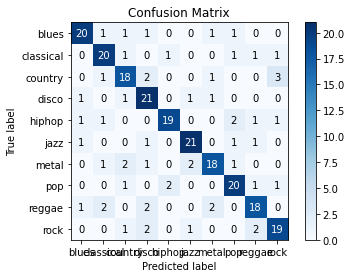



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

       blues       0.83      0.80      0.82        25
   classical       0.77      0.80      0.78        25
     country       0.72      0.72      0.72        25
       disco       0.70      0.84      0.76        25
      hiphop       0.86      0.76      0.81        25
        jazz       0.84      0.84      0.84        25
       metal       0.78      0.72      0.75        25
         pop       0.77      0.80      0.78        25
      reggae       0.75      0.72      0.73        25
        rock       0.76      0.76      0.76        25

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



********************************************************************************


In [31]:
from sklearn.svm import SVC
svc = SVC()

print('Results for svc:-\n')
start_time = time.time()
svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',svc_time)

y_pred1 = svc.predict(X_train)

start_time = time.time()
y_pred = svc.predict(X_test)
y_pred = predict_score(y_pred,y_test,0.28)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)

cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test)
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_svc)
print('Tesing score = ',acc2_svc)
print('\n')
print('*'*80)  

print('\n')
for i in range(len(np.unique(y_train))):
    err = np.sum(cm_svc[i])-cm_svc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',svc_miss)
print('Total % of missclassified points (test data) = ',(svc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

svc = [acc1_svc, acc2_svc, svc_miss, svc_miss/len(y_test), svc_time, svc_time2]

In [32]:
s1=[svc,knn,DT]
s2=['SVM','KNN','DT']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result['% of Missclasification'] *= 100

result

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,SVM,0.982667,0.776,56,22.4,42.675333,16.425156
1,KNN,0.734378,0.716,71,28.4,0.058563,1.067650
2,DT,1.000000,0.356,161,64.4,40.799945,0.041156


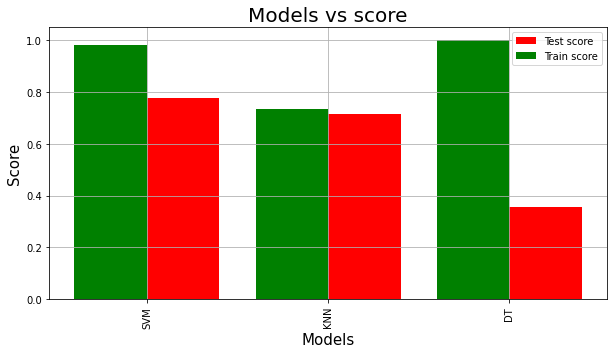

In [33]:
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Test score'], color ='red',width = 0.4)
plt.bar(x-0.2, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Test score','Train score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

In [ ]:
#mfcc --> phase space (2 dim) --> ravel (1 dim)